In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.load('../raw_data/data.npz', allow_pickle=True)

In [3]:
# Display the contents of the .npz file
data.files

['datetime', 'GHI', 'CLS', 'SZA', 'SAA']

In [4]:
datetime= data['datetime']

In [5]:
type(datetime)

numpy.ndarray

In [6]:
datetime.shape

(1845,)

In [7]:
X=data['GHI']

In [8]:
Y=data['CLS']

In [9]:
type(X)

numpy.ndarray

In [10]:
X.shape

(1845, 4, 81, 81)

In [11]:
X[100,3,:,:]

array([[179.27, 179.46, 186.71, ..., 216.46, 216.56, 216.8 ],
       [179.43, 179.61, 187.  , ..., 215.74, 215.72, 215.94],
       [176.17, 178.27, 189.95, ..., 215.72, 215.71, 215.96],
       ...,
       [188.73, 197.16, 199.88, ..., 175.8 , 171.85, 181.76],
       [199.56, 199.82, 200.08, ..., 156.04, 174.97, 177.5 ],
       [199.76, 200.02, 200.27, ..., 156.26, 175.22, 177.77]])

In [12]:
Y[0,:,0,0]

array([ 99.87, 141.58, 183.39, 224.3 , 263.68, 301.06, 336.05, 368.36])

In [13]:
Y[1,:,0,0]

array([397.75, 423.99, 446.92, 466.39, 482.28, 494.5 , 502.97, 507.6 ])

In [14]:
a=[]
for x in X[99,0,:,:]:
    a.append(np.min(x))
vmin=np.min(a)
vmin

138.03

In [15]:
b=[]
for x in X[99,0,:,:]:
    b.append(np.max(x))
vmax=np.max(b)  
vmax

536.55

In [16]:
print (vmin)
print (vmax)

138.03
536.55


In [17]:
X[100,3,:,:].shape

(81, 81)

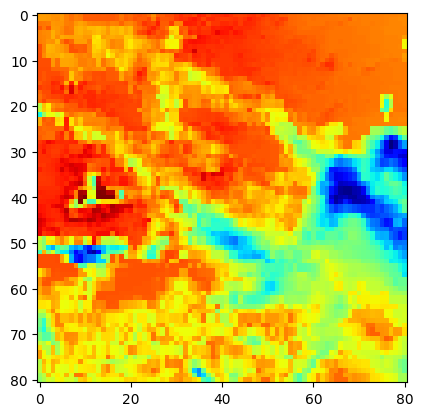

In [34]:
plt.imshow(X[99,0,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

In [71]:
tot=0
stat=[]
for x in range(X.shape[0]):
    for y in range(X.shape[1]):
        for z in range(X.shape[2]):
            for t in range (X.shape[3]):
                stat.append(X[x,y,z,t])
                if type(X[x,y,z,t]) != np.float64:
                    tot+=1
tot

0

In [72]:
df_GHI=pd.DataFrame(stat, columns=['GHI'])

In [73]:
df_GHI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48420180 entries, 0 to 48420179
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   GHI     float64
dtypes: float64(1)
memory usage: 369.4 MB


In [74]:
df_GHI.describe()

,GHI
count,4.842018e+07
mean,4.949039e+02
std,2.737931e+02
min,8.040000e+00
25%,2.507800e+02
50%,4.926200e+02
75%,7.184500e+02
max,1.101740e+03
